In [182]:
# importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# configuration
pd.set_option("display.max_columns",None)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 10)

In [184]:
#loading train and test dataset into dataframe
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,3,29,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,3,23,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,4,24,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,3,31,0,0,1,0,0,0,0,0,14,0.142826


In [185]:
test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,3,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,0,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,0,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,2,40,0,0,0,0,0,0,0,0,14


## Data Preprocessing

In [186]:
#looking for null values in the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

- No missing values
- There are 20 integer, 1 float and 1 object columns(22 columns)

In [187]:
train.shape

(1888, 22)

In [188]:
# Descriptive statistics
train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,30.233051,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,11.848663,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,29.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,35.000000,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,162.000000,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [189]:
# checking for columns with same value
for column in train.columns:
    if train[column].dtype != 'O' and train[column].std() == 0:
        print(column)

is_timer


In [190]:
# removing is_timer column
train.drop(['is_timer'],axis=1,inplace=True)
test.drop(['is_timer'],axis=1,inplace=True)

In [191]:
# collecting columns with names start with "is_"
import re
is_columns = list(filter(lambda x: re.findall("\Ais_",x), train.columns))

In [192]:
# looking into zero values percentage in the columns starting with "is_"
for i in is_columns:
    print(np.round(train[i].value_counts()/len(train)*100,2))

0    80.03
1    19.97
Name: is_weekend, dtype: float64
0    37.92
1    36.28
2    23.41
3     2.07
6     0.21
4     0.11
Name: is_image, dtype: float64
0    94.33
1     5.67
Name: is_personalised, dtype: float64
0    46.88
1    33.79
2    12.02
3     4.93
4     1.43
5     0.64
6     0.32
Name: is_quote, dtype: float64
0    86.12
1     9.11
2     2.86
3     1.59
4     0.21
6     0.11
Name: is_emoticons, dtype: float64
0    96.03
1     3.97
Name: is_discount, dtype: float64
0        99.31
5499      0.26
8000      0.11
5000      0.11
4999      0.05
1399      0.05
1000      0.05
14999     0.05
Name: is_price, dtype: float64
0    88.77
1    11.23
Name: is_urgency, dtype: float64


- we can see except **is_image** and **is_quote** other columns have zero as a majority value(>80%)

## Univariate analysis

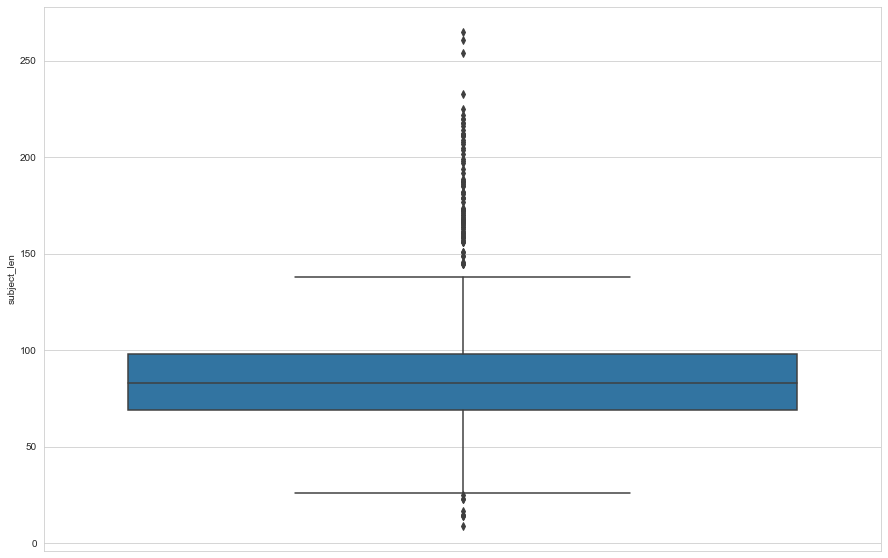

In [193]:

_ = sns.boxplot(y="subject_len",data=train)

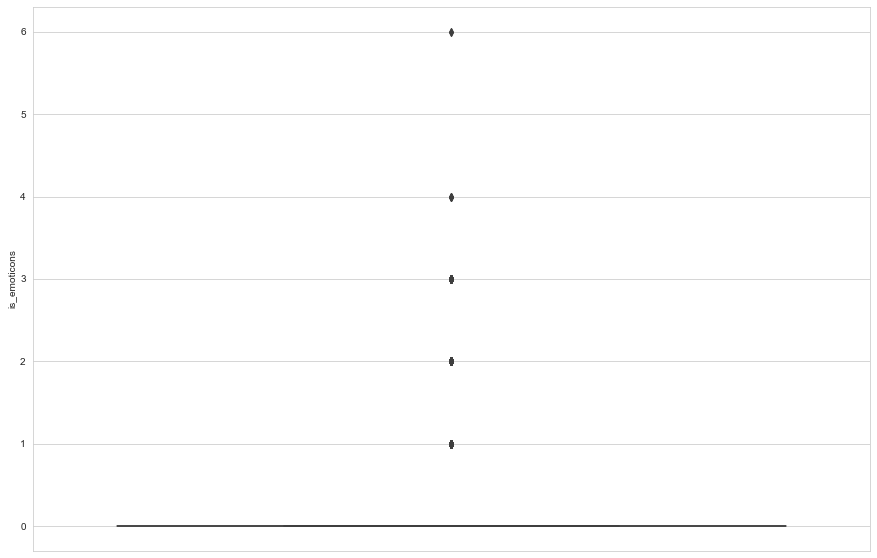

In [194]:
_ = sns.boxplot(y="is_emoticons",data=train)

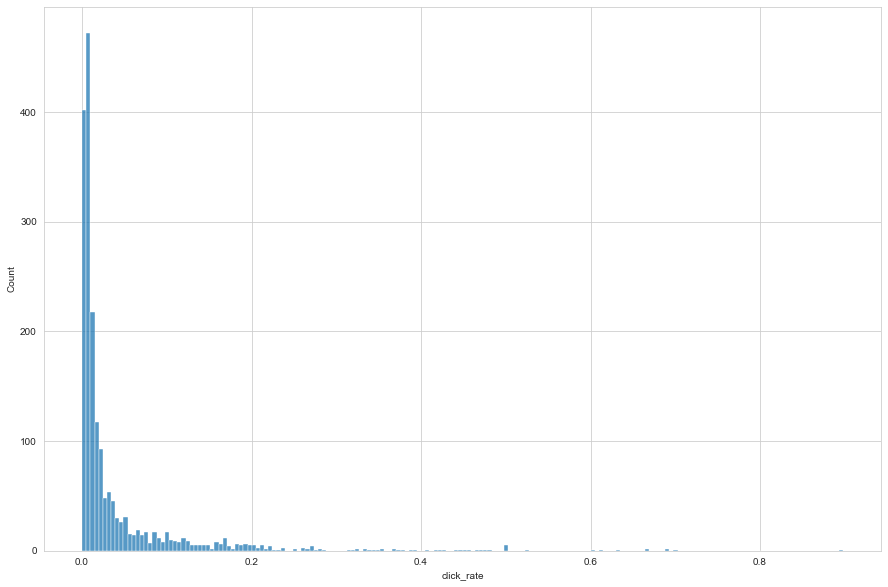

In [195]:
_ = sns.histplot(x='click_rate', data=train)

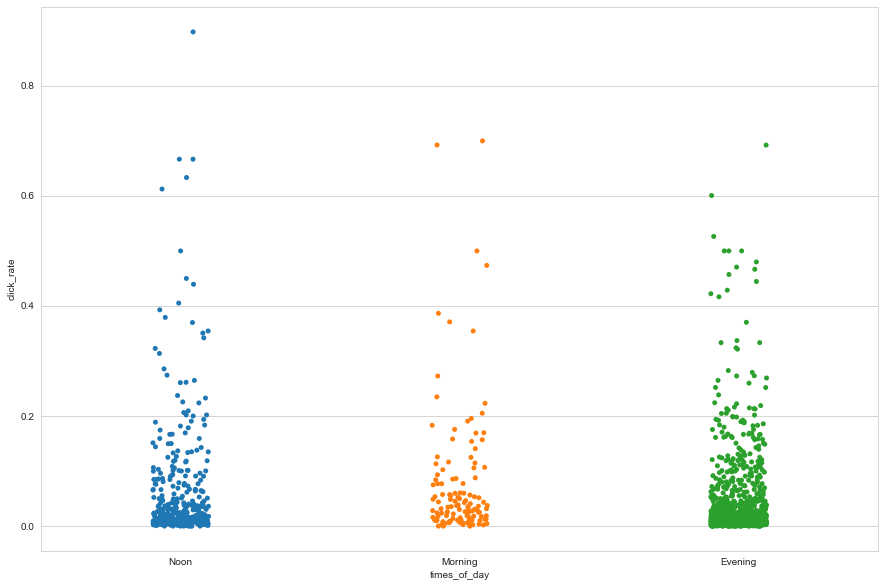

In [196]:
_ = sns.stripplot(x="times_of_day", y="click_rate",data=train)

- click density is high during the Evening than Morning and Noon

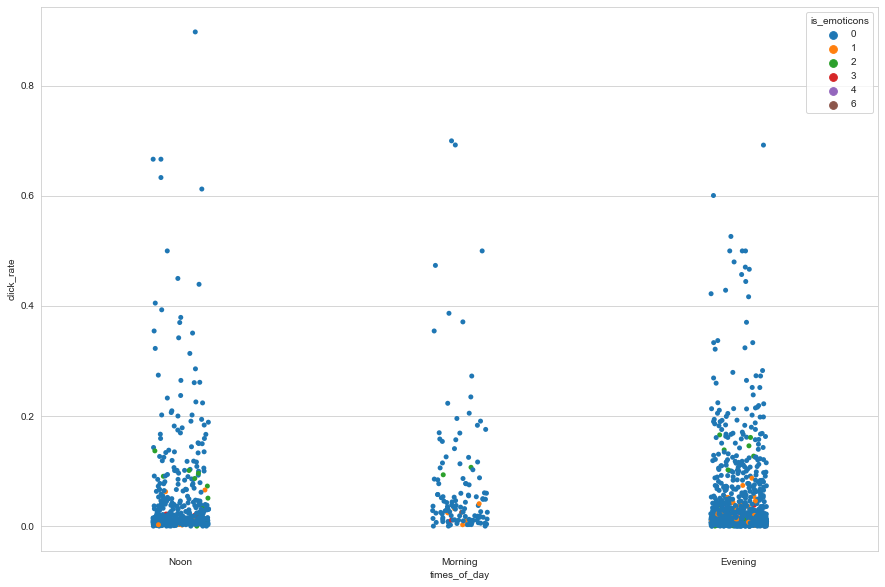

In [197]:
_ = sns.stripplot(x="times_of_day", y="click_rate",hue="is_emoticons",data=train)

## Data Transformation

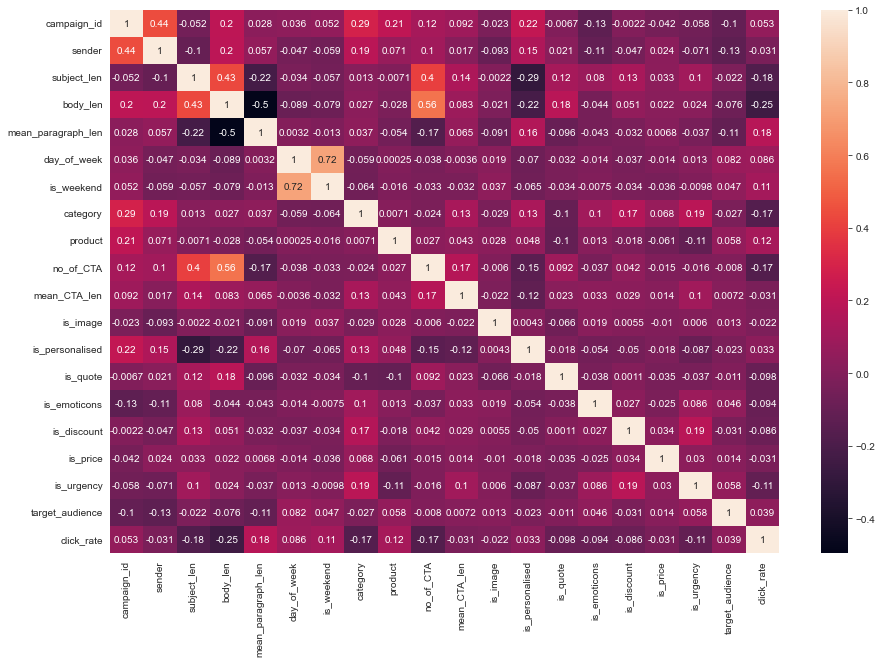

In [198]:
_ = sns.heatmap(train.corr(),annot=True)

- no significant correlation with click rate

In [199]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Feature Selection and PCA

In [200]:
# changing times_of_day into one hot encoded columns
encoded_times_train = pd.get_dummies(train["times_of_day"],drop_first=True)
encoded_times_test = pd.get_dummies(test["times_of_day"],drop_first=True)

In [201]:
# storing campaign_id's of test set for later use
test_camp_id = test["campaign_id"]

In [202]:
test_camp_id

0      1889
1      1890
2      1891
3      1892
4      1893
       ... 
757    2646
758    2647
759    2648
760    2649
761    2650
Name: campaign_id, Length: 762, dtype: int64

In [203]:
#removing campaign_id and times_of_day
train.drop(["times_of_day","campaign_id"],axis=1,inplace=True)
test.drop(["times_of_day","campaign_id"],axis=1,inplace=True)

In [204]:
train = pd.concat([encoded_times_train,train],axis=1)
test = pd.concat([encoded_times_test,test],axis=1)

In [205]:
train.head()

,Morning,Noon,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,0,1,3,76,10439,39,5,1,6,26,3,29,0,0,0,0,0,0,0,14,0.103079
1,1,0,3,54,2570,256,5,1,2,11,0,22,0,0,0,0,0,0,0,10,0.700000
2,0,1,3,59,12801,16,5,1,2,11,3,23,1,0,1,0,0,0,0,16,0.002769
3,0,0,3,74,11037,30,4,0,15,9,4,24,0,0,0,0,0,0,0,10,0.010868
4,0,1,3,80,10011,27,5,1,6,26,3,31,0,0,1,0,0,0,0,14,0.142826


In [206]:
test.head()

,Morning,Noon,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,0,1,3,61,12871,11,6,1,6,26,3,37,1,0,0,1,0,0,0,14
1,1,0,3,54,2569,256,5,1,2,11,0,22,0,0,0,0,0,0,0,10
2,0,0,3,88,1473,78,4,0,2,11,0,22,1,0,1,0,0,0,0,10
3,0,0,3,88,1473,78,3,0,2,11,0,22,1,0,1,0,0,0,0,10
4,0,1,3,78,9020,29,3,0,6,26,2,40,0,0,0,0,0,0,0,14


In [207]:
# breaking the train data into features and output
X = train.drop("click_rate",axis=1)
y = train["click_rate"]

In [208]:
#splitting the whole training data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=233)

In [209]:
X_train.shape,X_test.shape

((1510, 20), (378, 20))

In [210]:
# scaling the data with standard scaler
std = StandardScaler()
X_train = pd.DataFrame(std.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(std.transform(X_test),columns=X.columns)
# X_train = std.fit_transform(X_train)
# X_test = std.transform(X_test)

In [211]:
X_train.shape

(1510, 20)

In [212]:
# scaling the data with Minmax scaler
# minmax = MinMaxScaler()
# X_train = pd.DataFrame(minmax.fit_transform(X_train),columns=X.columns)
# X_test = pd.DataFrame(minmax.transform(X_test),columns=X.columns)

In [213]:
# pca = PCA(n_components=18)

In [214]:
# pca.fit(X_train)

In [215]:
# exp_var = pca.explained_variance_ratio_*100
# cum_exp_var = np.cumsum(exp_var)

In [216]:
# _ = plt.plot(range(len(cum_exp_var)),cum_exp_var)
# _ = plt.bar(range(len(cum_exp_var)),exp_var)

In [217]:
# X_train = pca.transform(X_train)

In [218]:
# X_test = pca.transform(X_test)

In [219]:
from sklearn.ensemble import RandomForestRegressor

In [220]:
rf = RandomForestRegressor(random_state=35)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=35)

In [221]:
y_pred = rf.predict(X_test)
r2_score(y_test,y_pred)

0.5471738612365458

## Hyperparameter Tuning

In [222]:
from sklearn.model_selection import GridSearchCV

In [223]:
params = {
    "n_estimators":[20,50,100,200,300],
    "max_depth": [None,2,5,10,30,50],
    "max_features": ["sqrt", "log2", None]
}

In [224]:
random_forest = RandomForestRegressor(random_state=35)

In [225]:
gs = GridSearchCV(random_forest,params,scoring="r2",n_jobs=-1,cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=35), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 5, 10, 30, 50],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [20, 50, 100, 200, 300]},
             scoring='r2')

In [226]:
gs.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}

In [227]:
y_pred = gs.predict(X_test)
r2_score(y_test,y_pred)

0.5869068754708394

In [123]:
std1 = StandardScaler()
X = pd.DataFrame(std1.fit_transform(X),columns=X.columns)
test = pd.DataFrame(std1.transform(test),columns=test.columns)

In [124]:
best_model = RandomForestRegressor(max_depth=30,max_features="sqrt", n_estimators=100)

In [125]:
best_model.fit(X,y)

RandomForestRegressor(max_depth=30, max_features='sqrt')

In [126]:
y_pred = best_model.predict(X)
r2_score(y,y_pred)

0.9372861027102729

In [51]:
final_pred = pd.DataFrame(best_model.predict(test),columns=["click_rate"])

In [52]:
result1 = pd.concat([test_camp_id,final_pred],axis=1)

In [53]:
result1.to_csv("submission1.csv",index=False)

## other algorithms